In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n', x)

poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [3]:
def polynomial_func(x):
    y = 1 + 2*x[:, 0] + 3*x[:, 0]**2 + 4*x[:, 1]**3
    return y

In [4]:
print('일차 단항식 계수 피처:\n', x)
y = polynomial_func(x)
print('삼차 다항식 결정값:\n', y)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [5]:
poly = PolynomialFeatures(degree=3).fit_transform(x)
print('변환된 3차 다항식 계수 피처:\n', poly)

변환된 3차 다항식 계수 피처:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(poly, y)
print('Polynomial 회귀 계수\n', np.round(lr.coef_, 2))
print('Polynomial 회귀 모양:', lr.coef_.shape)

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 모양: (10,)


/home/arti/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

def true_fun(x):
    return np.cos(1.5 * np.pi * x)

In [13]:
np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSEsms 0.40772896250986834 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSEsms 0.04320874987231747 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSEsms 182815433.47648773 입니다.


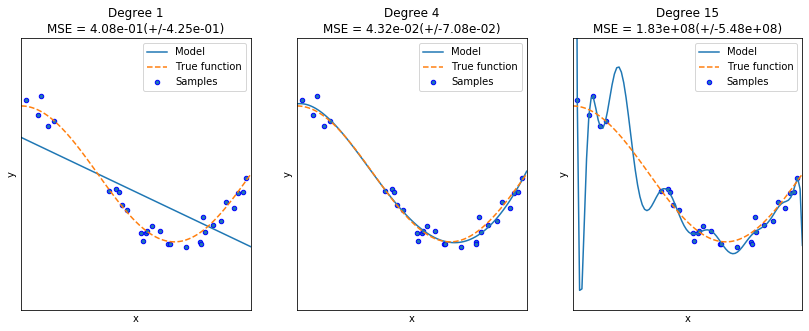

In [14]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    lr = LinearRegression()
    pipeline = Pipeline([('features', features),
                        ('lr', lr)])
    pipeline.fit(x.reshape(-1, 1), y)
    
    scores = cross_val_score(pipeline, x.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    
    coef = pipeline.named_steps['lr'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coef, 2)))
    print('Degree {0} MSEsms {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    xte = np.linspace(0, 1, 100)
    plt.plot(xte, pipeline.predict(xte[:, np.newaxis]), label="Model")
    plt.plot(xte, true_fun(xte), '--', label='True function')
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/-{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    